In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect('ppi.db')

In [3]:
query = "select * from degree_distribution"

In [5]:
# Execute the query and convert to dataframe
dd = pd.read_sql_query(query, con)
dd

,num_interactions,frequency
0,1,1953
1,2,967
2,3,581
3,4,354
4,5,289
...,...,...
118,88,1
119,85,1
120,79,1
121,71,1


Text(0.5, 1.0, 'Degree Distribution of HuRI Protein-Protein Interaction Network')

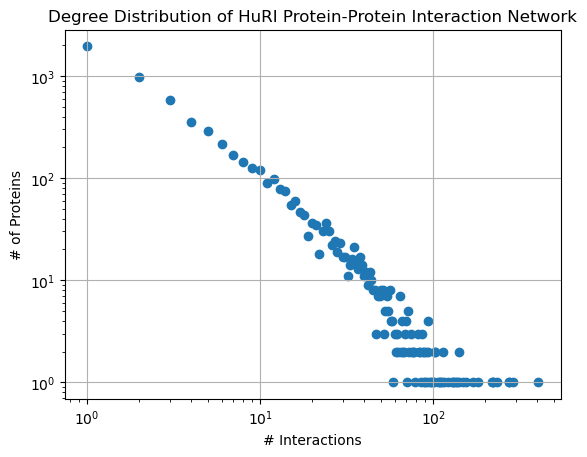

In [6]:
import matplotlib.pyplot as plt
plt.scatter(dd.num_interactions, dd.frequency)
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel('# Interactions')
plt.ylabel('# of Proteins')
plt.title('Degree Distribution of HuRI Protein-Protein Interaction Network')

In [7]:
ppi = pd.read_sql_query("SELECT * FROM ppi", con)
ppi

,a,b
0,ENSG00000000005,ENSG00000061656
1,ENSG00000000005,ENSG00000099968
2,ENSG00000000005,ENSG00000104765
3,ENSG00000000005,ENSG00000105383
4,ENSG00000000005,ENSG00000114455
...,...,...
52543,ENSG00000273899,ENSG00000273899
52544,ENSG00000275302,ENSG00000278619
52545,ENSG00000275774,ENSG00000275774
52546,ENSG00000276070,ENSG00000278619


In [8]:
# What does this network look like?
ppi[:100]

,a,b
0,ENSG00000000005,ENSG00000061656
1,ENSG00000000005,ENSG00000099968
2,ENSG00000000005,ENSG00000104765
3,ENSG00000000005,ENSG00000105383
4,ENSG00000000005,ENSG00000114455
...,...,...
95,ENSG00000002726,ENSG00000183640
96,ENSG00000002746,ENSG00000148704
97,ENSG00000002822,ENSG00000012779
98,ENSG00000002822,ENSG00000048540


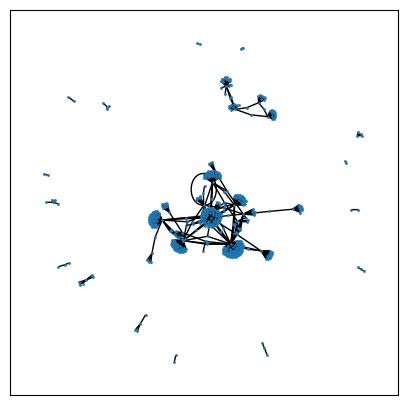

In [9]:
# Create a graph from the database
import networkx as nx

# Extract first N rows
df = ppi[:500]


# Create a graph
G = nx.from_pandas_edgelist(df, 'a', 'b', create_using=nx.Graph())

# Plot the graph
plt.figure(figsize=(5, 5))
nx.draw_networkx(G, with_labels=False, node_size=1)

# Show the plot
plt.show()

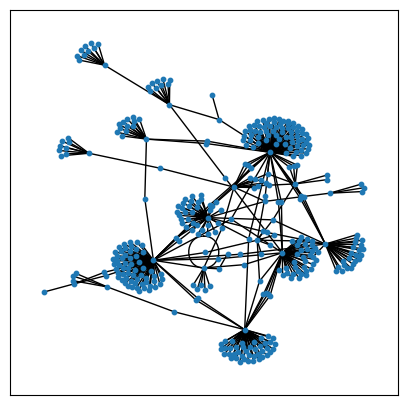

In [10]:
# Focus on the largest connected component
plt.figure(figsize=(5, 5))
largest_cc = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_cc)
nx.draw_networkx(subgraph, with_labels=False, node_size=10)
plt.show()

In [55]:
# Focussing on interactions BETWEEN high-degree nodes only
# We created a view called "degcount" that tracks the degree of every node

query = """

select *
from ppi
where a in (select a from degcount where adjacent > 50)
and b in (select a from degcount where adjacent > 50)
and a <> b

"""

hd = pd.read_sql_query(query, con)
hd

,a,b
0,ENSG00000002834,ENSG00000054965
1,ENSG00000002834,ENSG00000064218
2,ENSG00000002834,ENSG00000064999
3,ENSG00000002834,ENSG00000069011
4,ENSG00000002834,ENSG00000071539
...,...,...
1151,ENSG00000163206,ENSG00000187766
1152,ENSG00000163206,ENSG00000197191
1153,ENSG00000175294,ENSG00000187766
1154,ENSG00000175294,ENSG00000197191


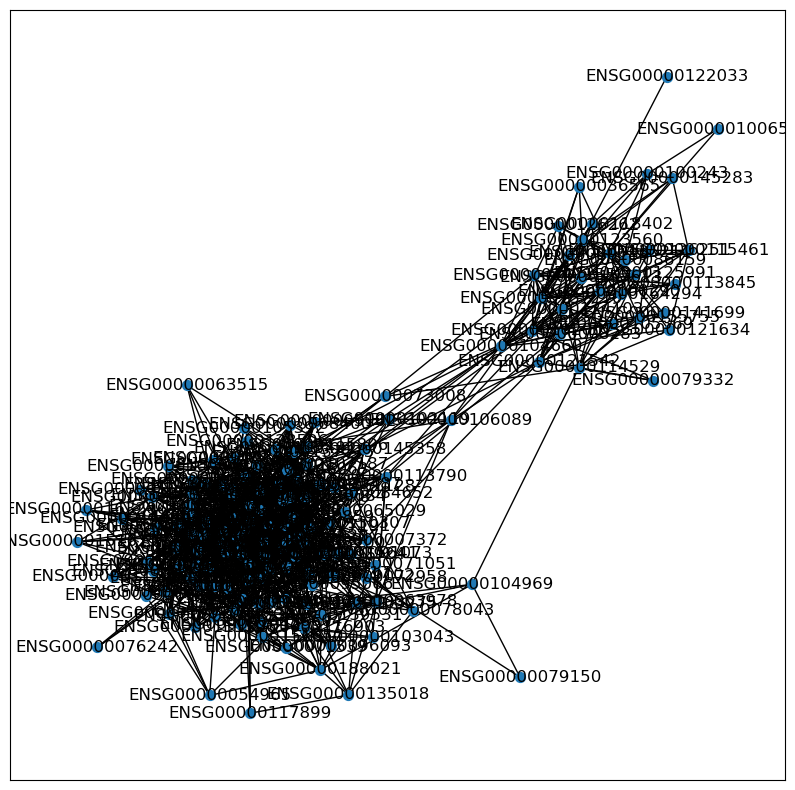

In [57]:
G = nx.from_pandas_edgelist(hd, 'a', 'b', create_using=nx.Graph())

# Plot the graph
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, with_labels=True, node_size=50)

# Show the plot
plt.show()